In [34]:
import numpy as np
from pymatching import Matching

import numpy as np

"""
Each column of Hz corresponds to a qubit, and each
row corresponds to a Z stabiliser.

Hz[i,j]==1 if Z stabiliser i acts non-trivially
on qubit j, and is 0 otherwise.

Hz = np.array([
    [1,0,1,1,1,0,0,0],
    [0,1,1,1,0,1,0,0],
    [1,0,0,0,1,0,1,1],
    [0,1,0,0,0,1,1,1]
])
"""
Hz = np.array([
    [1,1,0,1,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0],
    [0,0,0,0,1,1,0,1,1],
    [0,0,0,1,0,0,1,0,0]
])

Hz = np.array([
    [1,1,0,1,1,0,0,0,0,],
    [0,0,1,0,0,1,0,0,0],
    [0,0,0,0,1,1,0,1,1],
    [0,0,0,1,0,0,1,0,0]
])



m = Matching(Hz)
m

ValueError: This edge already exists in the graph. Parallel edges are not supported.

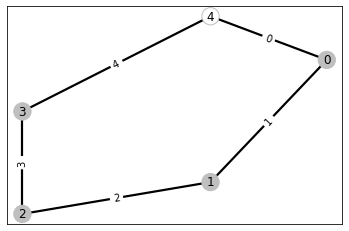

In [2]:
%matplotlib inline
m.draw()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack, kron, eye, csr_matrix, block_diag


def repetition_code(n):
    """
    Parity check matrix of a repetition code with length n.
    """
    row_ind, col_ind = zip(*((i, j) for i in range(n) for j in (i, (i+1)%n)))
    data = np.ones(2*n, dtype=np.uint8)
    return csr_matrix((data, (row_ind, col_ind)))


def toric_code_x_stabilisers(L):
    """
    Sparse check matrix for the X stabilisers of a toric code with
    lattice size L, constructed as the hypergraph product of
    two repetition codes.
    """
    Hr = repetition_code(L)
    H = hstack(
            [kron(Hr, eye(Hr.shape[1])), kron(eye(Hr.shape[0]), Hr.T)],
            dtype=np.uint8
        )
    H.data = H.data % 2
    H.eliminate_zeros()
    return csr_matrix(H)

In [15]:
def toric_code_x_logicals(L):
    """
    Sparse binary matrix with each row corresponding to an X logical operator
    of a toric code with lattice size L. Constructed from the
    homology groups of the repetition codes using the Kunneth
    theorem.
    """
    H1 = csr_matrix(([1], ([0],[0])), shape=(1,L), dtype=np.uint8)
    H0 = csr_matrix(np.ones((1, L), dtype=np.uint8))
    x_logicals = block_diag([kron(H1, H0), kron(H0, H1)])
    x_logicals.data = x_logicals.data % 2
    x_logicals.eliminate_zeros()
    return csr_matrix(x_logicals)

In [32]:
H= toric_code_x_stabilisers(3)

from pymatching import Matching
matching=Matching(H)

In [33]:
H.toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]],
      dtype=uint8)